In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import arviz as az
import pymc3 as pm

from modules.models.chapter_4 import gaussian_estimation, seven_scientists_estimation, repeated_iq_estimation
from modules.utils import validate_model, visualize_samples

In [18]:
PRPC_KWARGS={
    'samples': 1000
}
SAMPLING_KWARGS={
    'draws': 1000,
    'tune': 2000,
    'target_accept': 0.95
}
POPC_KWARGS={
    'samples': 1000
}

# Gaussian Estimation

C:\Users\penthotal\Desktop\git_repositories\learning_bayes\books\bayesian_cognitive_modelling\modules\utils.py:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(**sampling_kwargs)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 50 seconds.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


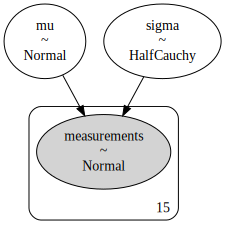

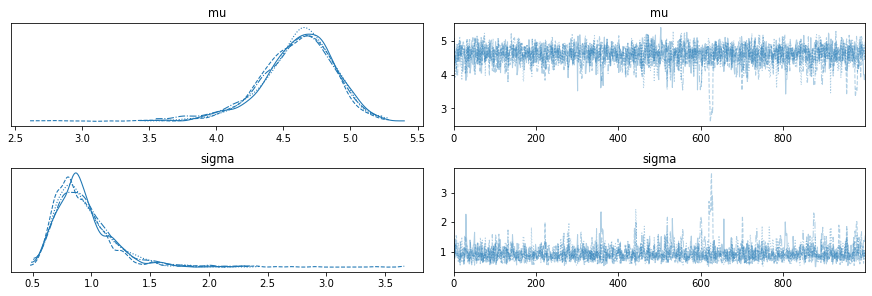

In [8]:
obs_measurements = np.random.normal(
    loc=5,
    scale=1,
    size=15
)
mu_kwargs = {
    'mu': 0,
    'sigma': 1
}
sigma_kwargs = {
    'beta': 25
}
model = gaussian_estimation(
    obs_measurements=obs_measurement,
    mu_kwargs=mu_kwargs,
    sigma_kwargs=sigma_kwargs
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

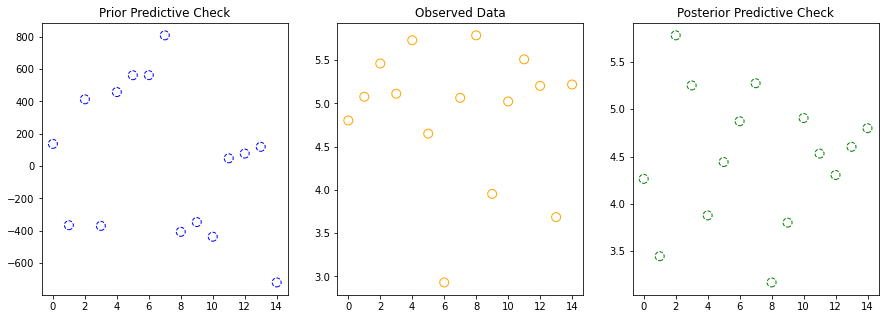

In [9]:
visualize_samples(
    observed=obs_measurement, 
    prpc=prpc['measurements'][0, :], 
    popc=popc['measurements'][0, :]
)

# Seven Scientists Estimation (AKA Eteroschedasticity)

C:\Users\penthotal\Desktop\git_repositories\learning_bayes\books\bayesian_cognitive_modelling\modules\utils.py:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(**sampling_kwargs)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 60 seconds.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


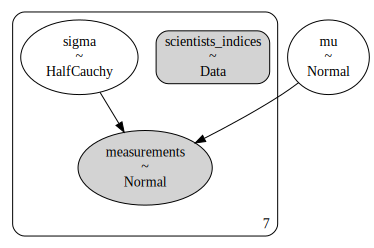

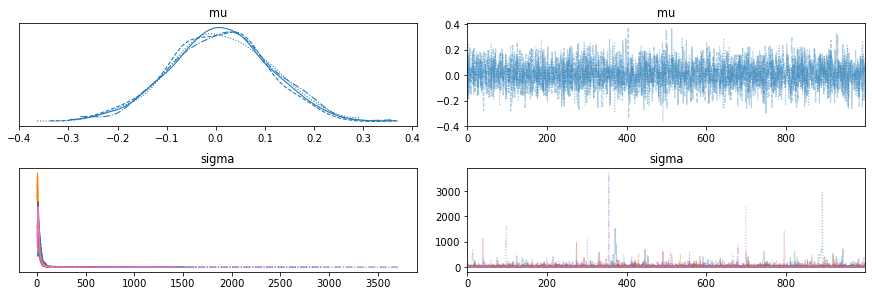

In [28]:
obs_measurements = np.array([-27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056])
mu_kwargs = {
    'mu': 0,
    'sigma': 0.1
}
sigma_kwargs = {
    'beta': 25
}
model = seven_scientists_estimation(
    obs_measurements=obs_measurements,
    mu_kwargs=mu_kwargs,
    sigma_kwargs=sigma_kwargs
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

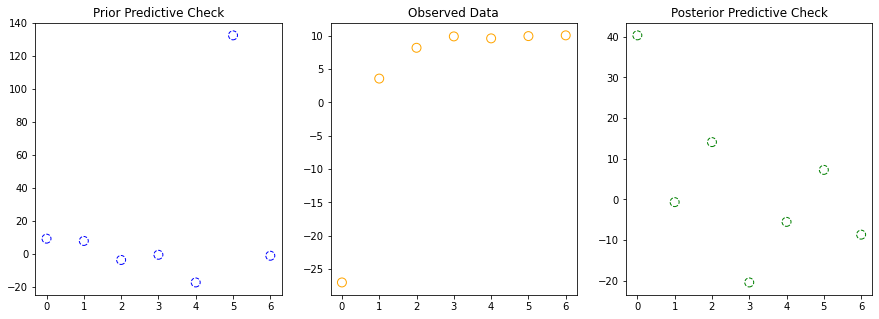

In [30]:
visualize_samples(
    observed=obs_measurements, 
    prpc=prpc['measurements'][0, :], 
    popc=popc['measurements'][0, :]
)

# IQ Measurements Estimation (AKA Repeated MEasurements Estimation)

C:\Users\penthotal\Desktop\git_repositories\learning_bayes\books\bayesian_cognitive_modelling\modules\utils.py:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(**sampling_kwargs)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 56 seconds.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


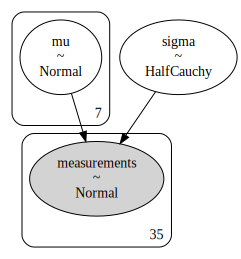

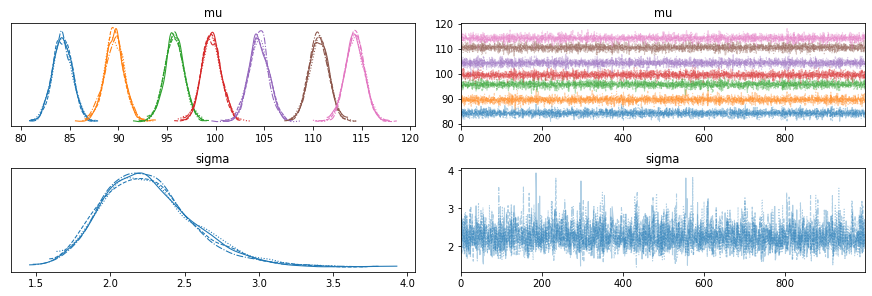

In [36]:
obs_measurements = []
id_ind = []

for ind, dev in enumerate([-15, -10, -5, 0, 5, 10, 15]):
    
    for test in range(5):
        
        id_ind.append(ind)
        obs_measurements.append(
            np.random.normal(
                loc=100+dev,
                scale=2
            )
        )

obs_measurements = np.array(obs_measurements)
id_ind = np.array(id_ind)

mu_kwargs = {
    'mu': 100,
    'sigma': 15
}
sigma_kwargs = {
    'beta': 25
}
model = repeated_iq_estimation(
    obs_measurements=obs_measurements,
    id_ind=id_ind,
    mu_kwargs=mu_kwargs,
    sigma_kwargs=sigma_kwargs
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

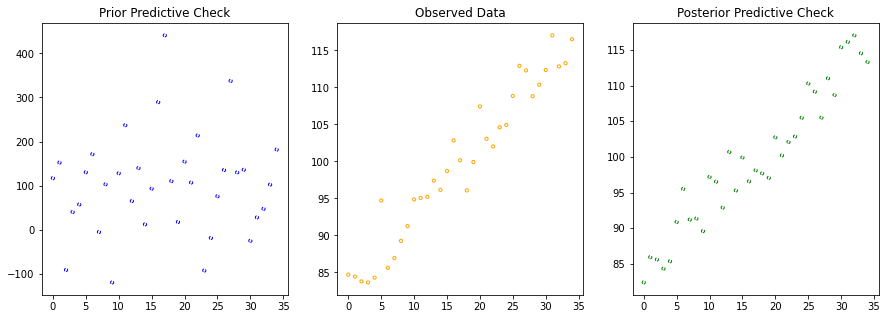

In [37]:
visualize_samples(
    observed=obs_measurements, 
    prpc=prpc['measurements'][0, :], 
    popc=popc['measurements'][0, :],
    s=10
)